# Monte Carlo Simulation - Materials Science

#### Name: Siddharth Mahala

Your coursework will be marked using the same version of Python as is available in the Simon building computer cluster. It is your responsibility to ensure that your code works in this version of Python. If your code does not run correctly due to incompatibility issues between the version of Python you used and the version that is used to mark your coursework, you will not get the marks! Therefore, it is recommended that you test your code in the Simon building cluster before you submit.

In this piece of coursework, we are going to model the oscillations of a damped spring (which might be used in a car's suspension, for example) which is subjected to a time-varying forcing (which could be caused by the driver's pattern of acceleration and braking and the associated interacation of the car with the road's surface). This problem can be modelled by the following differential equation:

$$\frac{d^2u(t)}{dt^2}+D\frac{du(t)}{dt}+Su(t)=f(t),$$

where $u(t)$ is the displacement of the spring in mm at time $t$ seconds, $D$ is a constant associated with the spring's damping, $S$ is a constant associated with its stiffness and $f(t)$ is a function that represents the time-varying forcing. The specific form of $f(t)$ you will be asked to use will be generated based on your student ID number (this should be something like 9023839). Please enter it into the code below after the equals sign on the first row, then run the code. You will then see a printed message telling you what form of $f(t)$ to use for the rest of the coursework.

In [1]:
ID=10760105 #EDIT THIS LINE ONLY TO ENTER YOUR ID NUMBER, THEN INPUT THE CELL

Ta,Tb,Tc,Td,Te=0.003*(ID % 2),0.01*(ID % 8),0.3*(ID % 2+1),4*(ID % 4),(ID % 19)
print('For the rest of this coursework, please use f(t) =',Ta,'t^4 -',Tb,'t^3 +',Tc,'t^2 -',Td,'t +',Te)
del Ta,Tb,Tc,Td,Te

For the rest of this coursework, please use f(t) = 0.003 t^4 - 0.01 t^3 + 0.6 t^2 - 4 t + 6


In the message above, the symbol <code>^</code> means "to the power of"; so, for example <code>t^3</code> represents $t^3$. Later, we will be using your student ID to generate other pieces of information (such as initial and boundary conditions), so please don't create any new variables called <code>ID</code>! Other temporary variables introduced throughout this coursework begin with a captical <code>T</code> such <code>Ta</code>, <code>TD</code> and <code>Ta1</code>, so to be safe, do not create any new variables that begin with a <code>T</code> and __do not edit any of the code provided__.

#### <span style="color: red"> Task 1:</span> Solve the governing equation to determine the spring's displacement $u(t)$ using the Euler Forward Method <span style="color: red"> </span>

We will assume that we know the displacement $u_0$ and rate of change of displacement $v_0$ at time

$$u(0)=u_0,\hspace{0.5cm}\text{and}\hspace{0.5cm}u'(0)=v_0.$$

The numerical values of $D$, $S$, $u_0$ and $v_0$ you should use are determined using your student ID number by the code below.

In [2]:
TD,TS,Tu0,Tv0=(ID % 19)/20+0.1,(ID % 17)/20+1.5,(ID % 200),(ID % 101)/10
print('Please use D =',TD,', S =',TS,', u0 =',Tu0,'and v0 =',Tv0)
del TD,TS,Tu0,Tv0

Please use D = 0.4 , S = 1.8 , u0 = 105 and v0 = 7.0


Compare your numerical solution to the exact solution, which for your $f(t)$ is generated by the code below, by plotting them both on the same set of axes.

In [3]:
TD,TS,Tu0,Tv0,Ta,Tb,Tc,Td,Te=(ID % 19)/20+0.1,(ID % 17)/20+1.5,(ID % 200),(ID % 101)/10,0.003*(ID % 2),0.01*(ID % 8),0.3*(ID % 2+1),4*(ID % 4),(ID % 19)
Ta1,Ta2,Ta4,Ta5,Ta6,Ta7,Ta8=TD/2,((-TD**2+4*TS)**0.5)/2,Ta/TS,-Tb/TS-4*Ta*TD/TS**2,Tc/TS+3*Tb*TD/TS**2+12*Ta*TD**2/TS**3-12*Ta/TS**2,-Td/TS+6*Tb/TS**2+48*Ta*TD/TS**3-2*Tc*TD/TS**2-6*Tb*TD**2/TS**3-24*Ta*TD**3/TS**4,Te/TS-2*Tc/TS**2-12*Tb*TD/TS**3-72*Ta*TD**2/TS**4+Td*TD/TS**2+24*Ta/TS**3+2*Tc*TD**2/TS**3+6*Tb*TD**3/TS**4+24*Ta*TD**4/TS**5
TA,TB=Tu0-Ta8,(Tv0+Ta1*Tu0-Ta1*Ta8-Ta7)/Ta2
print('The exact solution to compare to is u(t) = e^(-',"%.3g" % Ta1,'t)(',"%.3g" % TA, 'cos(', "%.3g" % Ta2,'t)+',"%.3g" % TB, ' sin(',"%.3g" % Ta2,'t))',"%+.3g" % Ta4,'t^4',"%+.3g" % Ta5,'t^3',"+%.3g" % Ta6,'t^2',"%+.3g" % Ta7,'t',"%+.3g" % Ta8)
del TD,TS,Tu0,Tv0,Ta,Tb,Tc,Td,Te,Ta1,Ta2,Ta4,Ta5,Ta6,Ta7,Ta8

The exact solution to compare to is u(t) = e^(- 0.2 t)( 102 cos( 1.33 t)+ 22.3  sin( 1.33 t)) +0.00167 t^4 -0.00704 t^3 +0.327 t^2 -2.34 t +3.49


Discretise the domain into 1000 pieces and enter your answer into the code cell below. Calculate and plot the solution over a period of ten seconds.

In [4]:
import numpy as np #import numpy package as np
import matplotlib.pyplot as plt #import pyplot from matplotlib as plt

#### The equations for the Euler Forward method is derived as below :
$$\frac{d^2u(t)}{dt^2}+D\frac{du(t)}{dt}+Su(t)=f(t),$$

As the following values are given:
$f(t)=0.003{t^4}-0.01{t^3}+0.6{t^2}+4{t}+6$

$u(0)=105$

$u'(0)=7.0$

$D=0.4$

$S=1.8$

So, $${u^j}=u^{j-1}+hv^{j-1}$$

$${v^j}=v^{j-1}(1-hD)-hSu^{j-1}+hf(t^{j-1})$$

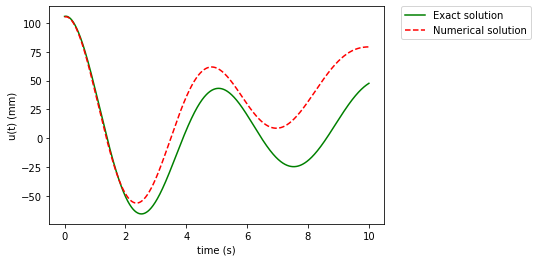

In [7]:
D = 0.4
S = 1.8

u = [105]
v = [7.0]
t0 = 0     # initial time is 0
tN = 10    # Given that have to calculate over a period of 10 seconds
N = 1000   # 1000 domain pieces specified in the question
h = (tN - t0) / N

t = np.linspace(t0, tN, N+1)  # to create a sequence of arrays
Ti = np.linspace(t0, tN-h, N)

# Iterating over the range, starting from index 1, not over the time array
for j in range(1, N+1):
    u.append(u[j-1] + h * v[j-1])  # Using u[j-1] instead of u[-1]
    v.append((1 - h * D) * v[j-1] - h * S * u[j-1] + h * (0.003 * t[j]**4 - 0.01 * t[j]**3 + 0.6 * t[j]**2 + 4 * t[j] + 6))  # Use t[j] instead of j

# Plotting the exact solution and numerical solution
plt.plot(t, np.exp(-0.2 * t) * 102 * np.cos(1.33 * t) + 22.3 * np.sin(1.33 * t) + 0.00167 * t**4 - 0.00704 * t**3 + 0.327 * t**2 - 2.34 * t + 3.49, '-g', label="Exact solution")
plt.plot(t, u, '--r', label="Numerical solution")

plt.xlabel('time (s)')   # label for the x-axis
plt.ylabel('u(t) (mm)')  # label for the y-axis
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  # gives control for manual placement of the legend

plt.show()


To test our modelling prediction, let's assume an experiment was carried out that measured the displacement of the spring at 1001 time points over a ten second period. The code below generates some data to simulate this experiment and stores it in a variable called <code>data</code>.

In [8]:
import numpy as np
np.random.seed(ID)
Tt=np.linspace(0,10,1001)
TD,TS,Tu0,Tv0,Ta,Tb,Tc,Td,Te=(ID % 19)/20+0.1,(ID % 17)/20+1.5,(ID % 200),(ID % 101)/10,0.003*(ID % 2),0.01*(ID % 8),0.3*(ID % 2+1),4*(ID % 4),(ID % 19)
Ta1,Ta2,Ta4,Ta5,Ta6,Ta7,Ta8=TD/2,((-TD**2+4*TS)**0.5)/2,Ta/TS,-Tb/TS-4*Ta*TD/TS**2,Tc/TS+3*Tb*TD/TS**2+12*Ta*TD**2/TS**3-12*Ta/TS**2,-Td/TS+6*Tb/TS**2+48*Ta*TD/TS**3-2*Tc*TD/TS**2-6*Tb*TD**2/TS**3-24*Ta*TD**3/TS**4,Te/TS-2*Tc/TS**2-12*Tb*TD/TS**3-72*Ta*TD**2/TS**4+Td*TD/TS**2+24*Ta/TS**3+2*Tc*TD**2/TS**3+6*Tb*TD**3/TS**4+24*Ta*TD**4/TS**5
TA,TB=Tu0-Ta8,(Tv0+Ta1*Tu0-Ta1*Ta8-Ta7)/Ta2
Tu=np.exp(-Ta1*Tt)*(TA*np.cos(Ta2*Tt)+TB*np.sin(Ta2*Tt))+Ta4*Tt**4+Ta5*Tt**3+Ta6*Tt**2+Ta7*Tt+Ta8
Tu=Tu+np.random.normal(0,abs(max(Tu)-min(Tu))/10,1001)
data=np.transpose(np.array([Tt,Tu]))
del Tt,Tu,TD,TS,Tu0,Tv0,Ta,Tb,Tc,Td,Te,Ta1,Ta2,Ta4,Ta5,Ta6,Ta7,Ta8

#### <span style="color: red"> Task 2:</span> Plot the numerical prediction made in Task 1 over the experimental data, plot the residuals showing the difference between the predicted solution and the experimental data and calculate the associated mean absolute error <span style="color: red"> </span>

If you did not manage to calculate a numerical prediction using the Euler Forward Method, you can use the exact solution instead.

#### Plot of prediction over experimental data:

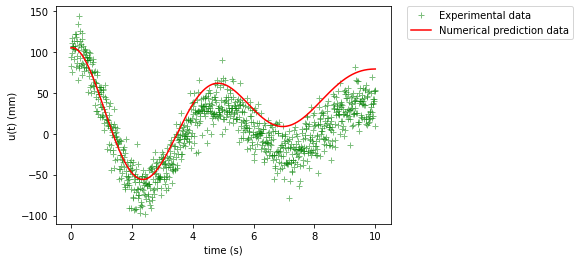

In [9]:
plt.plot(data[:,0], data[:,1], 'g+', alpha=0.5, label="Experimental data") #plotting that data as arrays of 1st column of vlaues considering it as 1-D and the value of alpha here is taken less than 1 to make the graph more transparent
plt.plot(t,u, '-r', label="Numerical prediction data")

plt.xlabel('time (s)') 
plt.ylabel('u(t) (mm)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

#### Residual plot and mean absolute error:

The mean absolute error from the euler forward method is 25.01 mm.


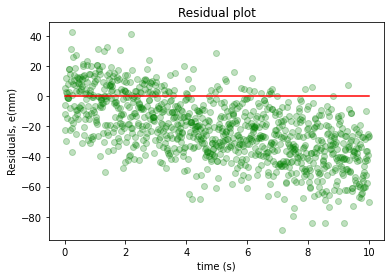

In [10]:
residual=data[:,1]-u  #making a variable residual which ultimately makes a row from deleting values of last from u, column wise
plt.plot(t,residual, 'go', alpha=0.25)
plt.plot(t,[0.]*len(t),'-r', alpha=1) #aplha is typically one by default which is ideal neither less transparent, nor more opaque

plt.xlabel('time (s)')
plt.ylabel('Residuals, e(mm)')
plt.title('Residual plot')

AbsError=abs(residual)
MeanAbsError=np.mean(AbsError) #the mean absolute error is the average difference between the observations i.e., true values and the predicted values or model output

print('The mean absolute error from the euler forward method is ' + str("{:.2f}".format(MeanAbsError)) + ' mm.')

#### <span style="color: red"> Task 3:</span> Analyse the residuals statistically<span style="color: red"> </span>

Plot the residuals as a histogram with 50 bins in relative frequency form, fit a normal distribution to them, plot it over the histogram, and report the _variance_ of the fitted distribution. Then use hypthesis testing to determine whether the residuals are normally distributed at the 5% significance level. Report the conclusion of the test as a sentence, giving the calculated p-value.

The variance of the residuals is 460.5272
The null hypothesis is unrejectable (residuals are normally distributed).
The test statistic is 2.9811 and the p-value is 0.2252


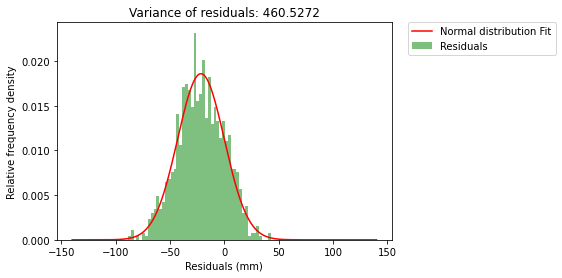

In [12]:
import numpy as np
import itertools
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

# Assuming 'residual' is already defined in your code

# Step 1: Calculate the variance
SquareErrors = residual**2  # Defining and calculating the squared errors
Sresidual = sum(SquareErrors)
na = np.mean(u)
Stotal = sum((u - na)**2)
Rsqr = 1 - Sresidual / Stotal  # This is R-squared, not variance, but keeping this for context

# Step 2: Calculate and report variance of residuals
variance_residuals = np.var(residual)
print('The variance of the residuals is {:.4f}'.format(variance_residuals))

# Step 3: Plotting the histogram of residuals and fitting the normal distribution
DataStat = list(itertools.chain(residual))
plt.hist(DataStat, 50, color='g', alpha=0.5, density=True, label="Residuals")
na, sigma = norm.fit(residual)  # Fitting normal distribution to residuals
x = np.linspace(-140, 140, 1000)  # from -140 to 140 in 1000 steps
plt.plot(x, norm.pdf(x, na, sigma), '-r', label="Normal distribution Fit")

# Step 4: Fix the incorrect label on the horizontal axis
plt.xlabel('Residuals (mm)')  # Change from u(t) to Residuals as per the feedback
plt.ylabel('Relative frequency density')

# Step 5: Displaying variance in the plot's title
plt.title(f'Variance of residuals: {variance_residuals:.4f}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Step 6: Perform normality test on residuals
l, p = stats.normaltest(residual)  # Normality test
alpha = 0.05  # Given 5% significance level

# Print results of normality test
if p < alpha:
    print(f"At the 5% level of significance, the null hypothesis that the residuals are normally distributed is rejected (p = {p:.4f})")
else:
    print("The null hypothesis is unrejectable (residuals are normally distributed).")

print(f"The test statistic is {l:.4f} and the p-value is {p:.4f}")


#### <span style="color: red"> Task 4:</span> Solve the governing equation to determine the spring's displacement $u(t)$ using the Finite Element Method <span style="color: red"> </span>

We will now assume that we instead know both the initial displacement $u_0$ and the displacement after 1 second $u_1$, so that we have

$$u(0)=u_0,\hspace{0.5cm}\text{and}\hspace{0.5cm}u(1)=u_1,$$

and we want to calculate the displacement at an arbitrary time between 0 and 1 seconds.

The numerical values of $u_0$ and $u_1$ you should use are determined using your student ID number by the code below.

In [16]:
print('Please use u0 =',(ID % 100)-50,'and u1 =',(ID % 101)-50)

Please use u0 = -45 and u1 = 20


Compare your numerical solution to the exact solution, which for your $f(t)$ is generated by the code below, by plotting them both on the same set of axes over the time range from 0 to 1 seconds.

In [17]:
# Step 1: Parameter initialization based on the student ID
ID = 10760105  # Example student ID, replace with actual ID

TD = (ID % 19) / 20 + 0.1
TS = (ID % 17) / 20 + 1.5
Tu0 = (ID % 100) - 50
Tu1 = (ID % 101) - 50
Ta = 0.003 * (ID % 2)
Tb = 0.01 * (ID % 8)
Tc = 0.3 * (ID % 2 + 1)
Td = 4 * (ID % 4)
Te = (ID % 19)
Tf = 1  # Time value (assumed to be 1 second)

# Step 2: Ensure non-zero values for TS to avoid division by zero
if abs(TS) < 1e-6:
    TS = 1e-6  # Assign a small value to avoid division by zero

# Step 3: Calculate Ta1 and Ta2, ensure valid square root domain for Ta2
Ta1 = TD / 2

# Ensure that the value inside the square root is non-negative
sqrt_term = -TD**2 + 4 * TS
if sqrt_term < 0:
    sqrt_term = 0  # Assign 0 to avoid a math domain error

Ta2 = np.sqrt(sqrt_term) / 2

# Step 4: Calculate other coefficients, ensuring TS^2 and TS^3 are non-zero
if abs(TS**2) < 1e-6:
    TS = 1e-3  # Make sure TS^2 is not too small

Ta4 = Ta / TS
Ta5 = -Tb / TS - 4 * Ta * TD / TS**2
Ta6 = Tc / TS + 3 * Tb * TD / TS**2 + 12 * Ta * TD**2 / TS**3 - 12 * Ta / TS**2
Ta7 = -Td / TS + 6 * Tb / TS**2 + 48 * Ta * TD / TS**3 - 2 * Tc * TD / TS**2 - 6 * Tb * TD**2 / TS**3 - 24 * Ta * TD**3 / TS**4
Ta8 = Te / TS - 2 * Tc / TS**2 - 12 * Tb * TD / TS**3 - 72 * Ta * TD**2 / TS**4 + Td * TD / TS**2 + 24 * Ta / TS**3 + 2 * Tc * TD**2 / TS**3 + 6 * Tb * TD**3 / TS**4 + 24 * Ta * TD**4 / TS**5

# Step 5: Calculate TA and TB, check for zero in np.sin(Ta2*Tf)
TA = Tu0 - Ta8

if abs(np.sin(Ta2 * Tf)) < 1e-6:
    sin_term = 1e-6  # Assign a small value to avoid division by zero
else:
    sin_term = np.sin(Ta2 * Tf)

TB = ((-Ta8 - Ta7 * Tf - Ta6 * Tf**2 - Ta5 * Tf**3 - Ta4 * Tf**4 + Tu1) * np.exp(Ta1 * Tf) + (Ta8 - Tu0) * np.cos(Ta2 * Tf)) / sin_term

# Step 6: Print the exact solution
print('The exact solution to compare to is u(t) = e^(-',"%.3g" % Ta1,'t)(',"%.3g" % TA, 'cos(', "%.3g" % Ta2,'t)+',"%.3g" % TB, ' sin(',"%.3g" % Ta2,'t))',"%+.3g" % Ta4,'t^4',"%+.3g" % Ta5,'t^3',"+%.3g" % Ta6,'t^2',"%+.3g" % Ta7,'t',"%+.3g" % Ta8)

# Step 7: Clean up the variables (optional, but good practice)
del TD, TS, Tu0, Tu1, Ta, Tb, Tc, Td, Te, Ta1, Ta2, Ta4, Ta5, Ta6, Ta7, Ta8


The exact solution to compare to is u(t) = e^(- 0.2 t)( -48.5 cos( 1.33 t)+ 35.4  sin( 1.33 t)) +0.00167 t^4 -0.00704 t^3 +0.327 t^2 -2.34 t +3.49


Calculate expressions for the residuals, $r_k$, and the Jacobian, $J_{kj}$, and write them in the Markdown cell below using LaTeX to ensure your mathematics is formatted correctly.

### Residuals and Jacobian Matrix

The residuals \( r_k \) are calculated as follows:

$$
r_k(U_1,U_2, \dots) = \int \mathcal{R}\left(x,u_p(x) + \sum_{j=1}^\infty U_j \psi_j(x)\right) \psi_k(x) \, dx
$$

where

$$
\mathcal{R}(x,u_w(x)) = \frac{d^2 u(t)}{dt^2} + D \frac{du(t)}{dt} + S u(t) - f(t)
$$

Thus, the residual \( r_k \) becomes:

$$
r_k(U_1,U_2, \dots) = \int_0^1 \left( \frac{d^2 u_p(t)}{dt^2} + \sum_{j=2}^{N-1} U_j \frac{d^2 \psi_j(t)}{dt^2} + D \left( \frac{du_p(t)}{dt} + \sum_{j=2}^{N-1} U_j \frac{d\psi_j(t)}{dt} \right) + S \left( u_p(t) + \sum_{j=2}^{N-1} U_j \psi_j(t) \right) - f(t) \right) \psi_k(t) \, dt
$$

Rearranging the equation, we get:

$$
r_k(U_1,U_2, \dots) = - \int_0^1 \left( \frac{du_p(t)}{dt} \frac{\partial \psi_k(t)}{\partial t} + \sum_{j=2}^{N-1} U_j \frac{\partial \psi_j(t)}{\partial t} \frac{\partial \psi_k(t)}{\partial t} \right) dt
$$

$$
+ \int_0^1 D \left( \frac{du_p(t)}{dt} + \sum_{j=2}^{N-1} U_j \frac{d\psi_j(t)}{dt} \right) \psi_k(t) \, dt
$$

$$
+ \int_0^1 S \left( u_p(t) + \sum_{j=2}^{N-1} U_j \psi_j(t) \right) \psi_k(t) \, dt - \int_0^1 f(t) \psi_k(t) \, dt
$$

The Jacobian matrix \( J_{kj} \) is calculated as:

$$
J_{kj} = - \int_0^1 \frac{\partial \psi_j(t)}{\partial t} \frac{\partial \psi_k(t)}{\partial t} \, dt
+ \int_0^1 D \frac{\partial \psi_j(t)}{\partial t} \psi_k(t) \, dt
+ \int_0^1 S \psi_j(t) \psi_k(t) \, dt
$$

$$
{where} 
j=2,3,...,N-1.$$


Use linear finite element shape functions, 12 nodal points and enter your answer into the code cell below.

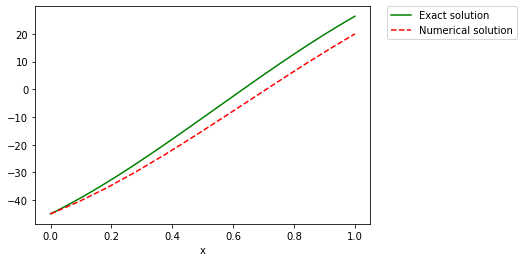

In [19]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# Step 1: Define the number of nodal points
N = 12  # Number of nodal points

# Step 2: Set some initial guesses for the constants U_j - we only need U to have length N-2 since j ranges between 2 and N-1
U = np.ones(N - 2)  # Initial guess for U

# Step 3: Boundary conditions
u0 = -45  # Left boundary condition
u1 = 20   # Right boundary condition

# Step 4: Define the linear finite element shape function (LFESF)
def LFESF(x, j, N):
    Xj = (j - 1) / (N - 1)
    Xjminus = (j - 2) / (N - 1)
    Xjplus = j / (N - 1)
    if x < Xjminus:
        return 0.0
    elif x < Xj:
        return (x - Xjminus) / (Xj - Xjminus)
    elif x < Xjplus:
        return (Xjplus - x) / (Xjplus - Xj)
    else:
        return 0.0

# Step 5: Define the derivative of the linear finite element shape function (DLFESF)
def DLFESF(x, j, N):
    Xj = (j - 1) / (N - 1)
    Xjminus = (j - 2) / (N - 1)
    Xjplus = j / (N - 1)
    if x < Xjminus:
        return 0.0
    elif x < Xj:
        return 1 / (Xj - Xjminus)
    elif x < Xjplus:
        return -1 / (Xjplus - Xj)
    else:
        return 0.0

# Step 6: Define the particular solution up(x) and its derivative Dup(x)
def up(x):  # Particular solution that satisfies the boundary conditions
    return u0 * LFESF(x, 1, N) + u1 * LFESF(x, N, N)

def Dup(x):  # Derivative of the particular solution
    return u0 * DLFESF(x, 1, N) + u1 * DLFESF(x, N, N)

# Step 7: Define the homogeneous solution uh(x) that satisfies homogeneous boundary conditions
def uh(x, U):  # Calculate the homogeneous solution
    output = np.zeros(len(x))
    LFESFlist = np.zeros(len(U))
    for xj in range(len(x)):  # For each input x value...
        for l in range(len(U)):  # For each entry in U...
            LFESFlist[l] = LFESF(x[xj], l + 2, N)  # Calculate the value of the shape function
        output[xj] = np.sum(U * LFESFlist)  # Output the constants times the shape functions
    return output

# Set up the while loop to iterate until the residual is small enough
tole = 1e-7  # Tolerance for convergence
maxres = 1 + tole

# Step 8: Start the iterative process
while maxres > tole:

    # Initialize residual and integration arrays
    r = np.zeros(N - 2)
    myint = np.zeros(N - 2)
    myint2 = np.zeros(N - 2)
    myint3 = np.zeros(N - 2)
    
    Nrange = range(N - 2)
    
    # Step 9: Calculate the residuals
    for l in Nrange:
        for j in Nrange:
            myint[j] = integrate.quad(lambda x: U[j] * DLFESF(x, j + 2, N) * DLFESF(x, l + 2, N), 0, 1, limit=100)[0]
            myint2[j] = integrate.quad(lambda x: U[j] * DLFESF(x, j + 2, N) * LFESF(x, l + 2, N), 0, 1, limit=100)[0]
            myint3[j] = integrate.quad(lambda x: U[j] * LFESF(x, j + 2, N) * LFESF(x, l + 2, N), 0, 1, limit=100)[0]
        
        r[l] = -(integrate.quad(lambda x: Dup(x) * DLFESF(x, l + 2, N), 0, 1, limit=100)[0] + np.sum(myint)) \
               + 0.15 * (integrate.quad(lambda x: Dup(x) * LFESF(x, l + 2, N), 0, 1, limit=100)[0] + np.sum(myint2)) \
               + 2.0 * (integrate.quad(lambda x: up(x) * LFESF(x, l + 2, N), 0, 1, limit=100)[0] + np.sum(myint3)) \
               - integrate.quad(lambda x: (0.3 * x**2 + 1) * LFESF(x, l + 2, N), 0, 1, limit=100)[0]
    
    # Update the maximum residual
    maxres = np.max(np.abs(r))

    # Step 10: Compute the Jacobian matrix J
    J = np.zeros((N - 2, N - 2))
    for j in range(N - 2):
        for l in range(N - 2):
            J[l, j] = -integrate.quad(lambda x: DLFESF(x, j + 2, N) * DLFESF(x, l + 2, N), 0, 1, limit=100)[0] \
                      + 0.15 * integrate.quad(lambda x: DLFESF(x, j + 2, N) * LFESF(x, l + 2, N), 0, 1, limit=100)[0] \
                      + 2.0 * integrate.quad(lambda x: LFESF(x, j + 2, N) * LFESF(x, l + 2, N), 0, 1, limit=100)[0]

    # Step 11: Solve for deltaU using the Jacobian and residuals
    deltaU = np.linalg.solve(J, -r)  # Solve J * deltaU = -r for deltaU

    # Step 12: Update the U vector
    U = deltaU + U

# Step 13: Final computation of the displacement u(t)
def FinalU(x, U):
    output = np.zeros(len(x))
    LFESFlist = np.zeros(len(U))  # To make sure the list of shape functions has the right length
    for xj in range(len(x)):
        for l in range(len(U)):
            LFESFlist[l] = LFESF(x[xj], l + 2, N)  # Calculating the value of the associated shape function
        output[xj] = up(x[xj]) + np.sum(U * LFESFlist)
    return output

# Step 14: Generate plot for comparison of the exact and numerical solutions
x = np.linspace(0, 1, 301)

# Plot the exact solution
plt.plot(x, np.exp(-0.2 * x) * (-48.5 * np.cos(1.33 * x)) + 35.4 * np.sin(1.33 * x) + 0.00167 * x**4 - 0.00704 * x**3 + 0.327 * x**2 - 2.34 * x + 3.49, '-g', label="Exact solution")

# Plot the numerical solution
plt.plot(x, FinalU(x, U), '--r', label="Numerical solution")

# Add labels and legend
plt.xlabel('x')  # Label for x-axis
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
